In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('hiber_train_zscore.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:3]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('hiber_test_zscore.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:3]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 2 2
 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2
 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2]
[[-2.08583698  0.39809964 -0.40449359]
 [-2.08583698 -0.22512344 -0.10050301]
 [-1.99222458 -1.15995804 -0.2524983 ]
 [-1.99222458  0.70971117  0.05149228]
 [-1.80499979 -1.47156958  0.96346402]
 [-1.80499979 -0.84834651 -0.55648888]
 [-1.7113874  -1.15995804 -0.55648888]
 [-1.7113874   1.02132271  0.81146873]
 [-1.7113874  -1.47156958  4.00336981]
 [-1.7113874  -0.84834651 -0.40449359]
 [-1.7113874  -0.53673497  0.96346402]
 [-1.7113874   1.33293424  0.50747815]
 [-1.7113874  -0.84834651 -0.55648

In [17]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-30
    for nearest_neighbor in range(1,int(1000 * 0.1)):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)

rel_knn_algorithm： brute
rel_weight： uniform
rel_nearest_neighbor： 38


**********************Result**********************
Training time cost 0.0009963512420654297 s
Test time cost 0.002994537353515625 s
knn_algorithm = brute ,nearest_neighbors = 29 ,weight = uniform ,accuracy= 0.7704918032786885


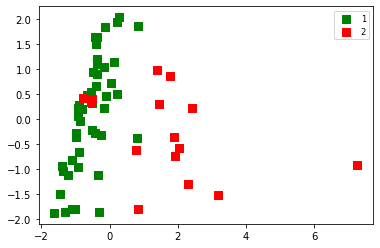

In [5]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]

    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')

    
    #plt.xlabel('x1'); plt.ylabel('x2');
    # ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
    # ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
    # ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
    # ax.scatter(axis_x1, axis_y1,axis_z1,  c='red', marker='s')
    # ax.scatter(axis_x2, axis_y2, axis_z2, c='blue')
    plt.legend(fontsize='small',labels=[ '1','2'])  
    plt.savefig("knn-matplotlib-zscore.png")
    plt.show()
    
print('**********************Result**********************')
time_start = time.time()

#创建一个K临近算法的模板
clf = neighbors.KNeighborsClassifier(n_neighbors = rel_nearest_neighbor, weights=rel_weight,
                                     algorithm=rel_knn_algorithm)

#fit函数 使用train_features作为训练数据，train_labels作为目标值（类似于标签）来拟合模型。
clf = clf.fit(train_features, train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')
time_start = time.time()

#调用predict函数进行预测
label_predict = clf.predict(test_features)
time_end = time.time()
print('Test time cost',time_end-time_start,'s')
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
#print(label_predict)
print('knn_algorithm =',rel_knn_algorithm,',nearest_neighbors =', rel_nearest_neighbor,',weight =',rel_weight,  ',accuracy=', accuracy)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit(X_pca[pre == 1],X_pca[pre == 2])

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))

#以下代码用交叉验证的方法计算KNN在该数据集分类预测中的准确性
knn = KNeighborsClassifier(n_neighbors=1)
score_knn_accuracy = np.mean(cross_val_score(estimator=knn, X=train_features, y=train_labels, cv=5, scoring='accuracy'))
print("Score_accuracy:",score_knn_accuracy)

F1_score = f1_score( test_labels, label_predict, average='micro' )
precision = precision_score(test_labels, label_predict, average='micro')
recall = recall_score(test_labels, label_predict, average='micro')

print("F1_score：",F1_score)
print("precision：",precision)
print("recall：",recall)

Predict_rlt: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 2]
Correct_no: 49
Accuracy: 0.8032786885245902
Score_accuracy: 0.6530612244897959
F1_score： 0.8032786885245902
precision： 0.8032786885245902
recall： 0.8032786885245902


In [13]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1
x = []
y = []
#nearest_neighbor参数范围为1-200
for nearest_neighbor in range(1,int(1000* 0.1)):
    clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights='uniform', algorithm='brute')
    clf = clf.fit(train_features, train_labels)

    pre = clf.predict(test_features)
    accuracy = np.sum(pre == test_labels) / pre.shape[0]
    x.append(nearest_neighbor)
    y.append(accuracy)
    print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
    if accuracy >= rel_pre:
        rel_pre = accuracy
        rel_nearest_neighbor = nearest_neighbor

print('rel_nearest_neighbor：',rel_nearest_neighbor)

knn_algorithm = brute ,nearest_neighbors = 1 ,weight = distance ,accuracy= 0.5737704918032787
knn_algorithm = brute ,nearest_neighbors = 2 ,weight = distance ,accuracy= 0.6557377049180327
knn_algorithm = brute ,nearest_neighbors = 3 ,weight = distance ,accuracy= 0.6229508196721312
knn_algorithm = brute ,nearest_neighbors = 4 ,weight = distance ,accuracy= 0.6885245901639344
knn_algorithm = brute ,nearest_neighbors = 5 ,weight = distance ,accuracy= 0.6721311475409836
knn_algorithm = brute ,nearest_neighbors = 6 ,weight = distance ,accuracy= 0.6885245901639344
knn_algorithm = brute ,nearest_neighbors = 7 ,weight = distance ,accuracy= 0.7049180327868853
knn_algorithm = brute ,nearest_neighbors = 8 ,weight = distance ,accuracy= 0.7377049180327869
knn_algorithm = brute ,nearest_neighbors = 9 ,weight = distance ,accuracy= 0.7377049180327869
knn_algorithm = brute ,nearest_neighbors = 10 ,weight = distance ,accuracy= 0.7377049180327869
knn_algorithm = brute ,nearest_neighbors = 11 ,weight = dis

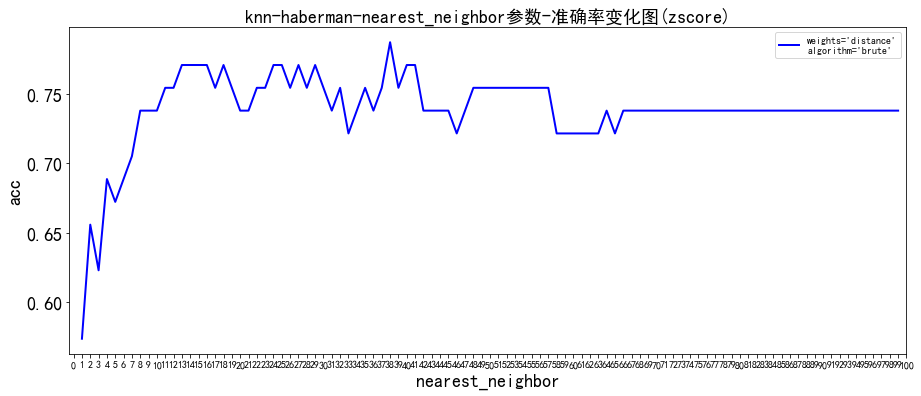

In [15]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,label="weights='uniform'\nalgorithm='brute'")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
# plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("nearest_neighbor",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("knn-haberman-nearest_neighbor参数-准确率变化图(zscore)",size=18) #图标题
plt.legend()  # 让图例生效
# # 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,100)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白

plt.savefig("knn-haberman-nearest_neighbor参数选择图(zscore).png") #保存图
plt.show()  #显示图